In [21]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")
IBMQ.load_account()

qiskit_runtime_service.__init__:INFO:2024-02-05 09:59:58,699: Default instance: ibm-q/open/main


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
import numpy as np

pi = np.pi

# IBMQ.enable_account('ENTER API KEY HERE')
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

circuit = QuantumCircuit(q, c)

circuit.x(q[2])
circuit.x(q[0])

qft_gate = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft')
circuit.append(qft_gate, q)
circuit.measure(q, c)
circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\n QFT Output")
print("-------------")
print(counts)

     ┌───┐┌──────┐┌─┐      
q_0: ┤ X ├┤0     ├┤M├──────
     └───┘│      │└╥┘┌─┐   
q_1: ─────┤1 qft ├─╫─┤M├───
     ┌───┐│      │ ║ └╥┘┌─┐
q_2: ┤ X ├┤2     ├─╫──╫─┤M├
     └───┘└──────┘ ║  ║ └╥┘
c: 3/══════════════╩══╩══╩═
                   0  1  2 
Job Status: job has successfully run

 QFT Output
-------------
{'010': 120, '101': 120, '001': 123, '000': 124, '111': 143, '011': 120, '110': 128, '100': 122}


                        ┌───┐                                       ┌───┐»
  q_upper: ─────────────┤ H ├───────────────■────────■────────■─────┤ H ├»
           ┌────────────┴───┴─────────────┐ │P(π/4)  │        │     └───┘»
q_lower_0: ┤0                             ├─■────────┼────────┼──────────»
           │                              │          │P(π/2)  │          »
q_lower_1: ┤1 Initialize(1,0,0,0,0,0,0,0) ├──────────■────────┼──────────»
           │                              │                   │P(π)      »
q_lower_2: ┤2                             ├───────────────────■──────────»
           └──────────────────────────────┘                              »
      c: 3/══════════════════════════════════════════════════════════════»
                                                                         »
«                                                
«  q_upper: ─■───────■────────────■──────────────
«            │P(-π)  │        ┌─┐ │              
«q_lower_0: ─■───────┼───

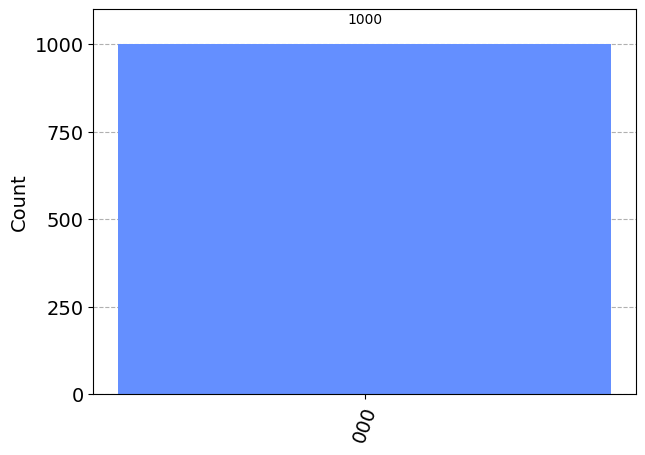

In [49]:
#Idealis phase estimation
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Define the number of qubits and the phase estimation precision
n = 3  # number of qubits
precision = 2**n

# Create quantum and classical registers
qreg_upper = QuantumRegister(1, 'q_upper')  # Upper qubit
qreg_lower = QuantumRegister(n, 'q_lower')  # Lower qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)

# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
circuit.initialize([1] + [0] * (2**n - 1), qreg_lower)

# Apply Hadamard gate to the upper qubit
circuit.h(qreg_upper[0])

# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n):
    circuit.cp(2 * 3.141592653589793 / (2**(n - qubit)), qreg_upper[0], qreg_lower[qubit])

# Apply the inverse quantum Fourier transform (IQFT)
circuit.h(qreg_upper[0])
for qubit in range(n):
    circuit.cp(-2 * 3.141592653589793 / (2**(qubit + 1)), qreg_upper[0], qreg_lower[qubit])

# Measure the lower qubits
circuit.measure(qreg_lower, creg)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
print(circuit)
# Display the histogram of measurement outcomes
counts = result.get_counts()
print("\nMeasurement outcomes:")
print("---------------------")
print(counts)

# Plot the histogram
plot_histogram(counts)


                        ┌───┐                                       ┌───┐»
  q_upper: ─────────────┤ H ├───────────────■────────■────────■─────┤ H ├»
           ┌────────────┴───┴─────────────┐ │P(π/4)  │        │     └───┘»
q_lower_0: ┤0                             ├─■────────┼────────┼──────────»
           │                              │          │P(π/2)  │          »
q_lower_1: ┤1 Initialize(1,0,0,0,0,0,0,0) ├──────────■────────┼──────────»
           │                              │                   │P(π)      »
q_lower_2: ┤2                             ├───────────────────■──────────»
           └──────────────────────────────┘                              »
      c: 3/══════════════════════════════════════════════════════════════»
                                                                         »
«                                                
«  q_upper: ─■───────■────────────■──────────────
«            │P(-π)  │        ┌─┐ │              
«q_lower_0: ─■───────┼───

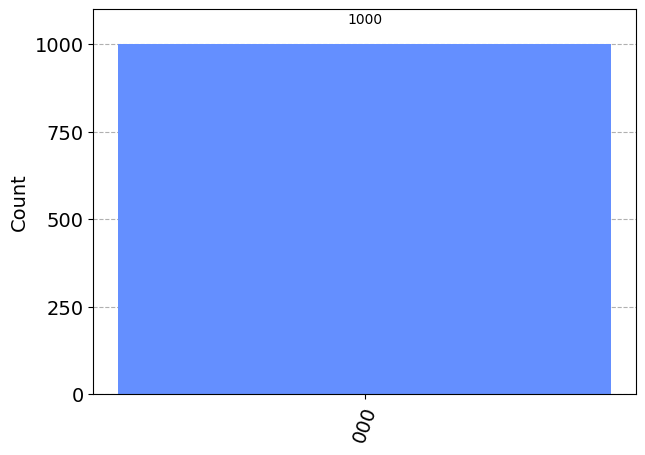

In [51]:
#Idealis phase estimation
#CASE 1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Define the number of qubits and the phase estimation precision
n = 3  # number of qubits
precision = 2**n
PI = 3.141592653589793

# Create quantum and classical registers
qreg_upper = QuantumRegister(1, 'q_upper')  # Upper qubit
qreg_lower = QuantumRegister(n, 'q_lower')  # Lower qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)

# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
circuit.initialize([1] + [0] * (2**n - 1), qreg_lower)

# Apply Hadamard gate to the upper qubit
circuit.h(qreg_upper[0])


"""circuit.h(qreg_lower[1])
circuit.h(qreg_lower[2])"""

# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n):
    circuit.cp(2 * PI / (2**(n - qubit)), qreg_upper[0], qreg_lower[qubit])

# Apply the inverse quantum Fourier transform (IQFT)
circuit.h(qreg_upper[0])
for qubit in range(n):
    circuit.cp(-2 * PI / (2**(qubit + 1)), qreg_upper[0], qreg_lower[qubit])

# Measure the lower qubits
circuit.measure(qreg_lower, creg)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
print(circuit)
# Display the histogram of measurement outcomes
counts = result.get_counts()
print("\nMeasurement outcomes:")
print("---------------------")
print(counts)

# Plot the histogram
plot_histogram(counts)

           ┌──────────────────────────────────────────────┐                  »
q_lower_0: ┤0                                             ├─■────────■───────»
           │                                              │ │P(π/8)  │       »
q_lower_1: ┤1                                             ├─■────────┼───────»
           │  Initialize(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) │          │P(π/4) »
q_lower_2: ┤2                                             ├──────────■───────»
           │                                              │                  »
q_lower_3: ┤3                                             ├──────────────────»
           └──────────────────────────────────────────────┘                  »
      c: 4/══════════════════════════════════════════════════════════════════»
                                                                             »
«                    ┌───┐┌───┐┌──────┐┌─┐         
«q_lower_0: ─■───────┤ H ├┤ X ├┤0     ├┤M├─────────
«            │       └───┘└

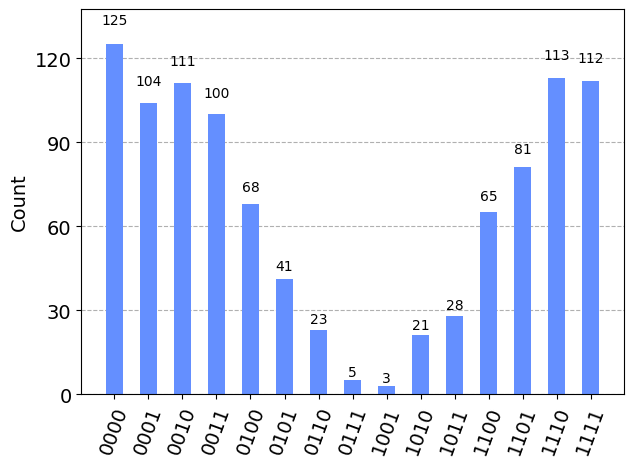

In [52]:
#CASE 2
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np

PI = np.pi
n = 4  # number of qubits

#---------INIT----------#
# Create quantum and classical registers
#qreg_upper = QuantumRegister(1, 'q_upper')  # Upper qubit
qreg_lower = QuantumRegister(n, 'q_lower')  # Lower qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
#circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)
circuit = QuantumCircuit(qreg_lower, creg)

# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as the initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
circuit.initialize([1] + [0] * (2**n - 1), qreg_lower)



#-------------MAKING INPUT----------#
# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n-1):
    #circuit.cy(qreg_lower[0], qreg_lower[qubit+1])
    #circuit.ch(qreg_lower[0], qreg_lower[qubit+1]) #egyik init
    circuit.cp(2 * PI / (2**(n - qubit)), qreg_lower[0], qreg_lower[qubit+1]) #masik init
    
circuit.h(qreg_lower[0])

"""circuit.h(qreg_lower[1])
circuit.h(qreg_lower[2])"""

#--------------IQFT----------------#
# preparing for IQFT
circuit.x(qreg_lower[2])
circuit.x(qreg_lower[0])
#circuit.x(qreg_lower[4])

# Apply Hadamard gate to the upper qubit
#circuit.h(qreg_lower[0])


# Apply inverse QFT
qft_gate = QFT(num_qubits=n, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft')
circuit.append(qft_gate, qreg_lower)

"""for qubit in range(n-1):
    circuit.cp(-2 * PI / (2**(qubit + 1)), qreg_lower[0], qreg_lower[qubit+1])"""


#----------MEASUREMENT-----------#
circuit.measure(qreg_lower, creg)

# Display the circuit
#circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

# Execute the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)

# Monitor the job
job_monitor(job)

# Get and display the measurement results
counts = job.result().get_counts()
print("\nIQFT Output")
print("-------------")
print(counts)
plot_histogram(counts)

           ┌──────────────────────────────────────────────┐                  »
q_lower_0: ┤0                                             ├─■────────■───────»
           │                                              │ │P(π/8)  │       »
q_lower_1: ┤1                                             ├─■────────┼───────»
           │  Initialize(1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) │          │P(π/4) »
q_lower_2: ┤2                                             ├──────────■───────»
           │                                              │                  »
q_lower_3: ┤3                                             ├──────────────────»
           └──────────────────────────────────────────────┘                  »
      c: 4/══════════════════════════════════════════════════════════════════»
                                                                             »
«                    ┌───┐┌───┐┌──────┐┌─┐         
«q_lower_0: ─■───────┤ X ├┤ H ├┤0     ├┤M├─────────
«            │       └───┘└

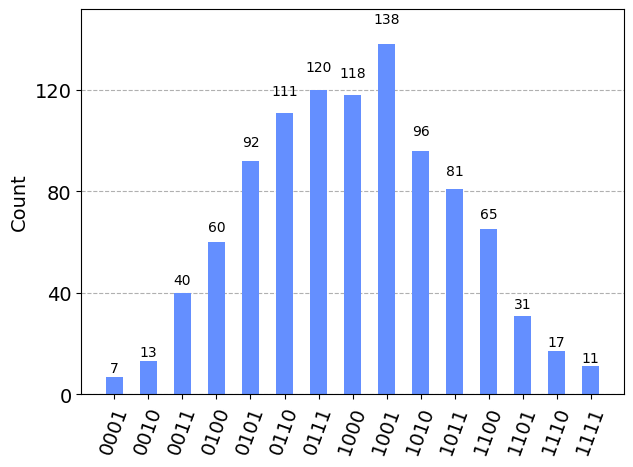

In [53]:
#CASE 3
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np

PI = np.pi
n = 4  # number of qubits

#---------INIT----------#
# Create quantum and classical registers
#qreg_upper = QuantumRegister(1, 'q_upper')  # Upper qubit
qreg_lower = QuantumRegister(n, 'q_lower')  # Lower qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
#circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)
circuit = QuantumCircuit(qreg_lower, creg)

# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as the initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
circuit.initialize([1] + [0] * (2**n - 1), qreg_lower)



#-------------MAKING INPUT----------#
# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n-1):
    #circuit.cy(qreg_lower[0], qreg_lower[qubit+1])
    #circuit.ch(qreg_lower[0], qreg_lower[qubit+1]) #egyik init
    circuit.cp(2 * PI / (2**(n - qubit)), qreg_lower[0], qreg_lower[qubit+1]) #masik init
    
#circuit.h(qreg_lower[0])

"""circuit.h(qreg_lower[1])
circuit.h(qreg_lower[2])"""

#--------------IQFT----------------#
# preparing for IQFT
circuit.x(qreg_lower[2])
circuit.x(qreg_lower[0])
#circuit.x(qreg_lower[4])

# Apply Hadamard gate to the upper qubit
circuit.h(qreg_lower[0])


# Apply inverse QFT
qft_gate = QFT(num_qubits=n, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft')
circuit.append(qft_gate, qreg_lower)

"""for qubit in range(n-1):
    circuit.cp(-2 * PI / (2**(qubit + 1)), qreg_lower[0], qreg_lower[qubit+1])"""


#----------MEASUREMENT-----------#
circuit.measure(qreg_lower, creg)

# Display the circuit
#circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

# Execute the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)

# Monitor the job
job_monitor(job)

# Get and display the measurement results
counts = job.result().get_counts()
print("\nIQFT Output")
print("-------------")
print(counts)
plot_histogram(counts)

           ┌──────────────────────────────────────────────┐                  »
q_lower_0: ┤0                                             ├─■────────■───────»
           │                                              │ │P(π/8)  │       »
q_lower_1: ┤1                                             ├─■────────┼───────»
           │  Initialize(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1) │          │P(π/4) »
q_lower_2: ┤2                                             ├──────────■───────»
           │                                              │                  »
q_lower_3: ┤3                                             ├──────────────────»
           └──────────────────────────────────────────────┘                  »
      c: 4/══════════════════════════════════════════════════════════════════»
                                                                             »
«                         ┌───┐┌──────┐┌─┐
«q_lower_0: ──────■───────┤ X ├┤0     ├┤M├
«           ┌───┐ │       └───┘│      │└╥┘
«q

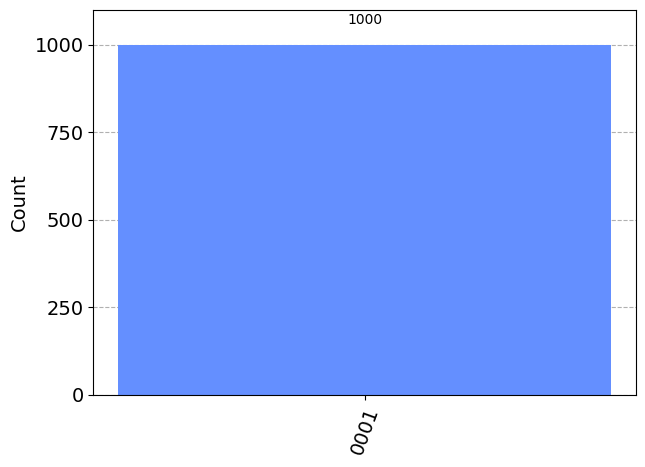

In [82]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np

PI = np.pi
n = 4  # number of qubits

from qiskit import IBMQ
#provider = IBMQ.load_account()  # Load your IBM Quantum Experience account

# Choose an available backend
#backend = provider.get_backend('your_preferred_backend_name')


#---------INIT----------#
# Create quantum and classical registers
#qreg_upper = QuantumRegister(1, 'q_upper')  # Upper qubit
qreg_lower = QuantumRegister(n, 'q_lower')  # Lower qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
#circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)
circuit = QuantumCircuit(qreg_lower, creg)

# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as the initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
circuit.initialize([0] * (2**n - 1)+[1], qreg_lower)


#-------------MAKING INPUT----------#
# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n-1):
    #circuit.cy(qreg_lower[0], qreg_lower[qubit+1])
    #circuit.ch(qreg_lower[0], qreg_lower[qubit+1]) #egyik init
    circuit.cp(2 * PI / (2**(n - qubit)), qreg_lower[0], qreg_lower[qubit+1]) #masik init
    
for qubit in range(n-1):
    circuit.h(qreg_lower[qubit+1])

"""circuit.h(qreg_lower[1])
circuit.h(qreg_lower[2])"""

#--------------IQFT----------------#
# preparing for IQFT
circuit.x(qreg_lower[2])
circuit.x(qreg_lower[0])
#circuit.x(qreg_lower[4])

# Apply Hadamard gate to the upper qubit
#circuit.h(qreg_lower[0])


# Apply inverse QFT
qft_gate = QFT(num_qubits=n, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='qft')
circuit.append(qft_gate, qreg_lower)

"""for qubit in range(n-1):
    circuit.cp(-2 * PI / (2**(qubit + 1)), qreg_lower[0], qreg_lower[qubit+1])"""


#----------MEASUREMENT-----------#
"""for i in range(circuit.num_qubits-1):
    circuit.measure(qreg_lower[i], creg[i])"""
circuit.measure(qreg_lower[0], creg[0])

# Display the circuit
#circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

# Execute the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)

# Monitor the job
job_monitor(job)

# Get and display the measurement results
counts = job.result().get_counts()
print("\nIQFT Output")
print("-------------")
print(counts)
plot_histogram(counts)

            ┌───┐                      ┌───────┐┌─┐      
q_0: ───────┤ H ├───────────────────■──┤0      ├┤M├──────
            ├───┤                   │  │       │└╥┘┌─┐   
q_1: ───────┤ H ├──────────────■────┼──┤1      ├─╫─┤M├───
            ├───┤              │    │  │  IQFT │ ║ └╥┘┌─┐
q_2: ───────┤ H ├─────────■────┼────┼──┤2      ├─╫──╫─┤M├
     ┌──────┴───┴──────┐┌─┴─┐┌─┴─┐┌─┴─┐│       │ ║  ║ └╥┘
q_3: ┤ Initialize(1,0) ├┤ X ├┤ X ├┤ X ├┤3      ├─╫──╫──╫─
     └─────────────────┘└───┘└───┘└───┘└───────┘ ║  ║  ║ 
c: 4/════════════════════════════════════════════╩══╩══╩═
                                                 0  1  2 
Job Status: job has successfully run

IQFT Output
-------------
{'0111': 33, '0011': 213, '0001': 39, '0101': 205, '0000': 510}


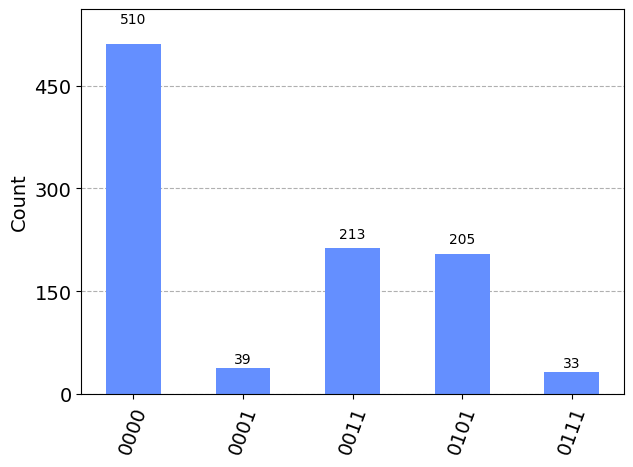

In [93]:
# Phase estimator - in the initialized input 1 is in the first or the second half => output: 0 or 1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

PI = np.pi
n = 4  # number of qubits

# Az IBMQ fiókaink betöltése és a legkevésbé leterhelt háttértároló eszköz megszerzése, amelynek (n+1) kubit vagy több van
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
"""backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Legkevésbé leterhelt backend: ", backend)"""


#---------INIT----------#
# Create quantum and classical registers
qreg = QuantumRegister(n, 'q')  #qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
#circuit = QuantumCircuit(qreg_upper, qreg_lower, creg)
circuit = QuantumCircuit(qreg, creg)




# Initialize the lower qubits with the eigenvector |u
# Note: You need to provide the specific eigenvector |u as the initial state
# For simplicity, let's assume |u = |0 for demonstration purposes
#circuit.initialize([1 + [0] * (2**n - 1), qreg)
#circuit.initialize([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0], qreg)
circuit.initialize([1,0], qreg[n-1])

for qubit in range(n-1):
    circuit.h(qreg[qubit])

#-------------MAKING INPUT----------#
# Apply controlled unitary operations based on the phase estimation algorithm
for qubit in range(n-1):
    circuit.cx(qreg[n-qubit-2],qreg[n-1])   

#--------------IQFT----------------#
# Apply Hadamard gate to the upper qubit
#circuit.h(qreg[0])


# Apply inverse QFT
circuit.append(QFT(num_qubits=n, inverse=True), qreg)


#----------MEASUREMENT-----------#
#circuit.measure(qreg[0], creg[0])
for i in range(circuit.num_qubits-1):
    circuit.measure(qreg[i], creg[i])

# Display the circuit
#circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

# Execute the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
"""
# futtatas kv.szamitogepen
transpiled_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_circuit)"""

# Monitor the job
job_monitor(job, interval=2)

# Get and display the measurement results
counts = job.result().get_counts()
print("\nIQFT Output")
print("-------------")
print(counts)
plot_histogram(counts)

                ┌───┐                      ┌───────┐┌─┐         
upper_0: ───────┤ H ├───────────────────■──┤0      ├┤M├─────────
                ├───┤                   │  │       │└╥┘┌─┐      
upper_1: ───────┤ H ├──────────────■────┼──┤1      ├─╫─┤M├──────
                ├───┤              │    │  │  IQFT │ ║ └╥┘┌─┐   
upper_2: ───────┤ H ├─────────■────┼────┼──┤2      ├─╫──╫─┤M├───
                ├───┤         │    │    │  │       │ ║  ║ └╥┘┌─┐
upper_3: ───────┤ H ├─────────┼────┼────┼──┤3      ├─╫──╫──╫─┤M├
         ┌──────┴───┴──────┐┌─┴─┐┌─┴─┐┌─┴─┐└───────┘ ║  ║  ║ └╥┘
 bottom: ┤ Initialize(1,0) ├┤ X ├┤ X ├┤ X ├──────────╫──╫──╫──╫─
         └─────────────────┘└───┘└───┘└───┘          ║  ║  ║  ║ 
 creg: 4/════════════════════════════════════════════╩══╩══╩══╩═
                                                     0  1  2  3 


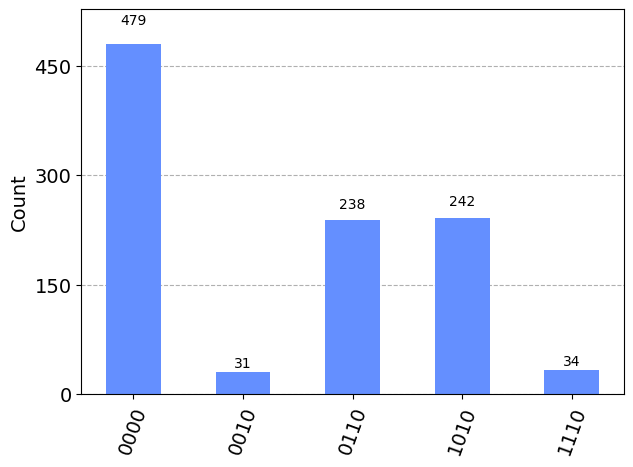

In [132]:
# Phase estimator - in the initialized input 1 is in the first or the second half => output: 0 or 1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

PI = np.pi
t=1
n=4

# Create quantum registers
upper_register = QuantumRegister(n, 'upper')
bottom_register = QuantumRegister(t, 'bottom')
classical_reg = ClassicalRegister(n, 'creg')


# Construct quantum circuit
qc = QuantumCircuit(upper_register, bottom_register, classical_reg)

#qc.initialize([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], upper_register) #alapbol 0-ra van inicializalva
qc.initialize([1,0], bottom_register)


# Apply Hadamard gates on upper register
qc.h(upper_register)

for qubit in range(n-1):
    qc.cx(upper_register[n-qubit-2],bottom_register)   
#qc.cx(upper_register,bottom_register) 

# Apply Inverse Quantum Fourier Transform (IQFT)
qc.append(QFT(n, inverse=True), upper_register)

# Measure upper register
qc.measure(upper_register, classical_reg)

print(qc)

# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result()

# Get the counts
counts = result.get_counts(qc)

# Visualize the counts
plot_histogram(counts)

ibmqfactory.load_account:WARNING:2024-02-10 10:18:17,247: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


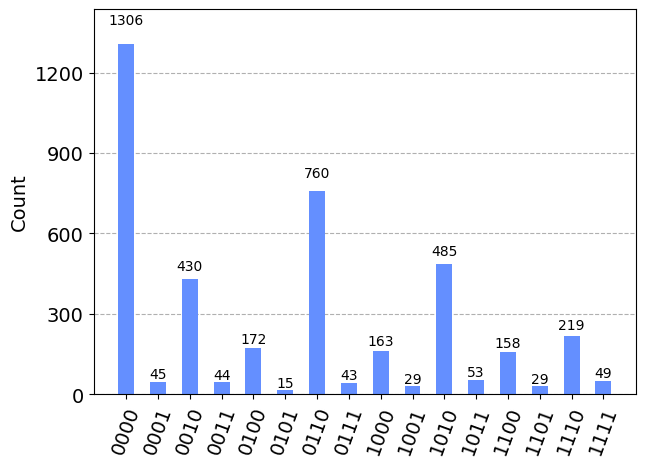

In [130]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from qiskit.providers.ibmq import least_busy, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

# Load IBM Quantum Experience account
IBMQ.load_account()

# Define your quantum and classical registers
n = 4
t = 1
upper_register = QuantumRegister(n, 'upper')
bottom_register = QuantumRegister(t, 'bottom')
classical_reg = ClassicalRegister(n, 'creg')

# Construct quantum circuit
qc = QuantumCircuit(upper_register, bottom_register, classical_reg)

# Initialize the bottom register
qc.initialize([1, 0], bottom_register)

# Apply Hadamard gates on upper register
qc.h(upper_register)

# Apply controlled-NOT gates
for qubit in range(n - 1):
    qc.cx(upper_register[n - qubit - 2], bottom_register)

# Apply Inverse Quantum Fourier Transform (IQFT)
qc.append(QFT(n, inverse=True), upper_register)

# Measure the upper register
qc.measure(upper_register, classical_reg)

# Choose an IBM Quantum device to run the circuit
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and not x.configuration().simulator and x.status().operational==True))

# Transpile the circuit for the selected backend
qc_transpiled = transpile(qc, backend)

# Execute the circuit on the selected backend
job = backend.run(qc_transpiled)

# Monitor the job
job_monitor(job)

# Get the results
result = job.result()

# Get the counts
counts = result.get_counts(qc)

# Visualize the counts
plot_histogram(counts)

     ┌──────────────────────┐┌───┐     ┌───┐┌─┐
q_0: ┤0                     ├┤ H ├──■──┤ H ├┤M├
     │  Initialize(0,1,0,0) │├───┤┌─┴─┐└───┘└╥┘
q_1: ┤1                     ├┤ H ├┤ X ├──────╫─
     └──────────────────────┘└───┘└───┘      ║ 
c: 2/════════════════════════════════════════╩═
                                             0 
Job Status: job has successfully run

IQFT Output
-------------
{'01': 1000}


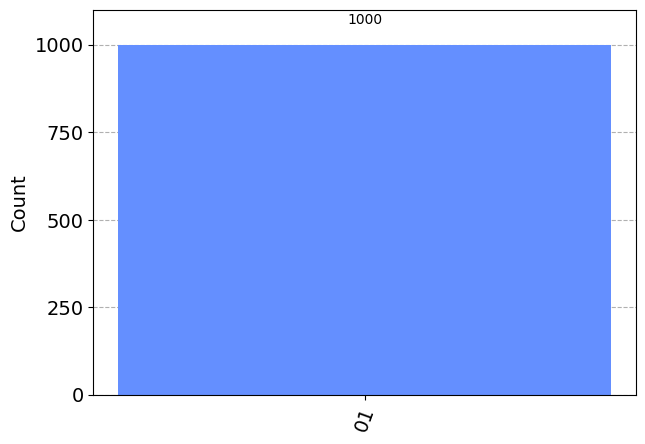

In [41]:
#Deutsch–Jozsa circuit as a simple phase estimator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

PI = np.pi
n = 2  # number of qubits

# Az IBMQ fiókaink betöltése és a legkevésbé leterhelt háttértároló eszköz megszerzése, amelynek (n+1) kubit vagy több van
#IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
"""backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Legkevésbé leterhelt backend: ", backend)"""


#---------INIT----------#
# Create quantum and classical registers
qreg = QuantumRegister(n, 'q')  #qubits
creg = ClassicalRegister(n, 'c')  # Classical register for measurement outcomes

# Create quantum circuit
circuit = QuantumCircuit(qreg, creg)
initial_state = [0, 1, 0, 0]  # Amplitudes for |00⟩, |01⟩, |10⟩, |11⟩
circuit.initialize(initial_state, qreg)


for qubit in range(n):
    circuit.h(qreg[qubit])


circuit.cx(qreg[0],qreg[1])   


circuit.h(qreg[0])


#----------MEASUREMENT-----------#
circuit.measure(qreg[0], creg[0])

# Display the circuit
print(circuit)

# Execute the circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1000)
"""
# futtatas kv.szamitogepen
transpiled_circuit = transpile(circuit, backend, optimization_level=3)
job = backend.run(transpiled_circuit)"""

# Monitor the job
job_monitor(job, interval=2)

# Get and display the measurement results
counts = job.result().get_counts()
print("\nIQFT Output")
print("-------------")
print(counts)
plot_histogram(counts)